In [ ]:

import numpy as np

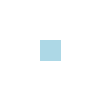

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display

# Crear una imagen en blanco de 100x100 píxeles con fondo transparente
width, height = 100, 100
img = Image.new('RGBA', (width, height), color=(0, 0, 0, 0))  # Fondo transparente

# Dibujar un píxel azul claro en el centro
draw = ImageDraw.Draw(img)
pixel_size = 20  # Tamaño del píxel
x_center, y_center = width // 2, height // 2  # Posición central
left = x_center - (pixel_size // 2)
top = y_center - (pixel_size // 2)
right = x_center + (pixel_size // 2)
bottom = y_center + (pixel_size // 2)
draw.rectangle([left, top, right, bottom], fill=(173, 216, 230))  # Color azul claro en formato RGB

# Mostrar la imagen en la consola
display(img)


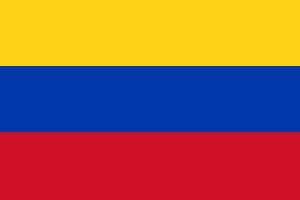

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display

# Dimensiones de la bandera
ancho = 300
alto = 200

# Crear una nueva imagen con las dimensiones de la bandera
imagen = Image.new('RGB', (ancho, alto))

# Dibujar las franjas de la bandera
draw = ImageDraw.Draw(imagen)

# Franja amarilla en la parte superior
draw.rectangle([0, 0, ancho, alto // 3], fill=(252, 209, 22))

# Franja azul en el medio
draw.rectangle([0, alto // 3, ancho, 2 * (alto // 3)], fill=(0, 56, 168))

# Franja roja en la parte inferior
draw.rectangle([0, 2 * (alto // 3), ancho, alto], fill=(206, 17, 38))

# Mostrar la bandera de Colombia
display(imagen)


In [ ]:
m = np.zeros((60,100,3),dtype='int8')

In [ ]:
m[0,0,0]= 255
m[0,0,1]= 255
m[0,0,2]= 255

In [ ]:
m[0:30, :,0]=252
m[0:30, :,0]=209
m[0:30, :,0]=22

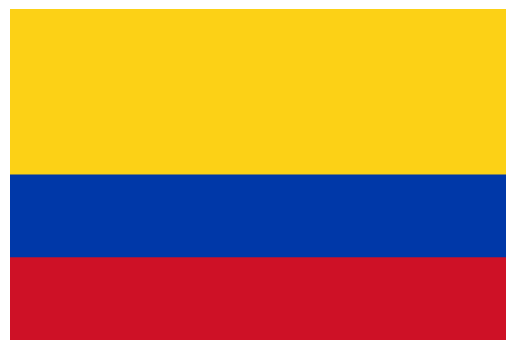

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones de la bandera
ancho = 300
alto = 200

# Crear una matriz para la bandera con valores iniciales de cero (fondo negro)
bandera = np.zeros((alto, ancho, 3), dtype=np.uint8)

# Definir los colores RGB para cada franja
amarillo = (252, 209, 22)
azul = (0, 56, 168)
rojo = (206, 17, 38)

# Establecer la altura de las franjas
altura_amarillo = alto // 2
altura_azul = (alto - altura_amarillo) // 2
altura_rojo = alto - altura_amarillo - altura_azul

# Pintar las franjas en la matriz de la bandera
bandera[:altura_amarillo] = amarillo
bandera[altura_amarillo:altura_amarillo + altura_azul] = azul
bandera[altura_amarillo + altura_azul:] = rojo

# Mostrar la bandera de Colombia
plt.imshow(bandera)
plt.axis('off')
plt.show()


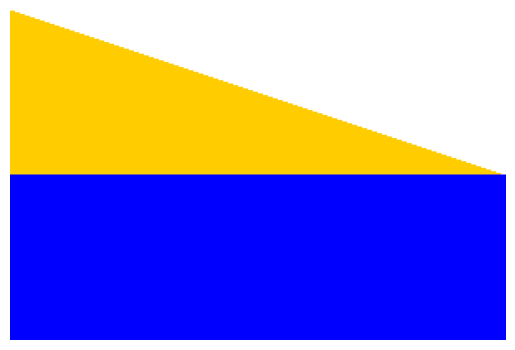

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones de la bandera
ancho = 300
alto = 200

# Crear una matriz para la bandera con valores iniciales de cero (fondo azul)
bandera = np.zeros((alto, ancho, 3), dtype=np.uint8)
bandera[:, :, 2] = 255  # Establecer el canal azul a 255 para obtener un fondo azul

# Altura de los triángulos
altura_triangulo = alto // 2

# Definir los colores RGB para los triángulos
blanco = (255, 255, 255)
amarillo = (255, 204, 0)  # Amarillo de la bandera de Bosnia y Herzegovina

# Dibujar los triángulos blanco y amarillo
for i in range(altura_triangulo):
    bandera[i, i * ancho // altura_triangulo:] = blanco
    bandera[i, :i * ancho // altura_triangulo] = amarillo

# Mostrar la bandera de Bosnia y Herzegovina
plt.imshow(bandera)
plt.axis('off')
plt.show()


In [ ]:
!wget https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/home-improvement/wp-content/uploads/2022/07/download-23.jpg -O casa.jpg

--2023-09-22 19:30:37--  https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/home-improvement/wp-content/uploads/2022/07/download-23.jpg
Resolving thumbor.forbes.com (thumbor.forbes.com)... 151.101.1.55, 151.101.65.55, 151.101.129.55, ...
Connecting to thumbor.forbes.com (thumbor.forbes.com)|151.101.1.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102183 (100K) [image/jpeg]
Saving to: ‘casa.jpg’

casa.jpg            100%[===================>]  99.79K  --.-KB/s    in 0.03s   

2023-09-22 19:30:38 (3.48 MB/s) - ‘casa.jpg’ saved [102183/102183]



In [ ]:
img = plt.imread("casa.jpg")

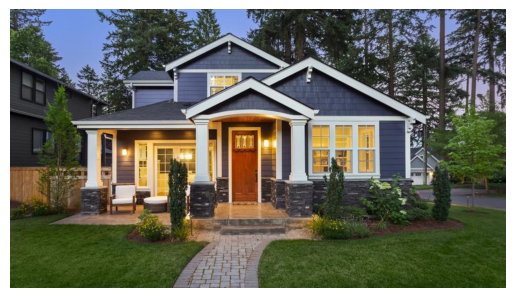

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img2 = img[:,:,0]

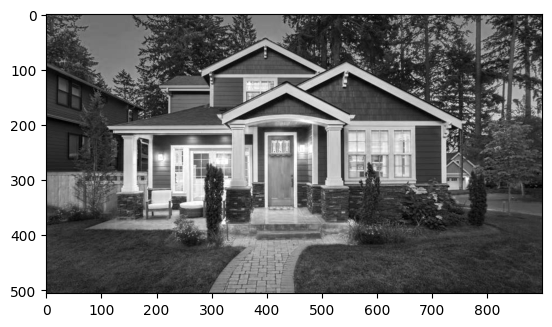

In [ ]:
plt.imshow(img2, cmap='gray')

In [ ]:
filtro = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])


In [ ]:
img2.shape

(506, 900)

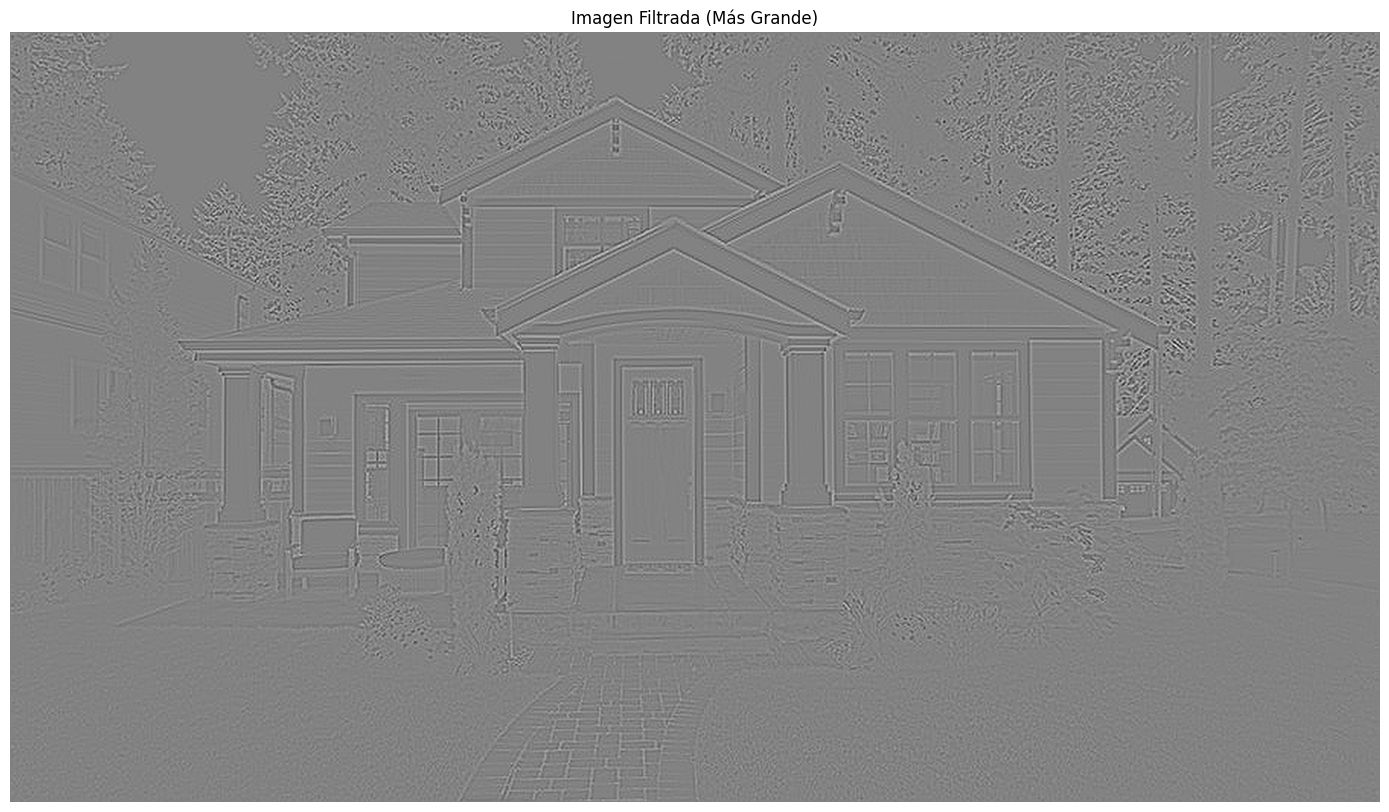

In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
imagen = Image.open("casa.jpg").convert('L')
imagen = np.array(imagen)

# Definir un filtro 3x3 de ejemplo
filtro = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

# Aplicar el filtro a la imagen mediante convolución
resultado = np.zeros_like(imagen, dtype=np.float32)

for i in range(1, imagen.shape[0] - 1):
    for j in range(1, imagen.shape[1] - 1):
        subimagen = imagen[i-1:i+2, j-1:j+2]
        valor = np.sum(subimagen * filtro)
        resultado[i, j] = valor

factor_de_escala = 2
imagen_filtrada_grande = zoom(resultado, factor_de_escala)

plt.figure(figsize=(18, 10))

plt.imshow(imagen_filtrada_grande, cmap='gray')
plt.title("Imagen Filtrada (Más Grande)")
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
from PIL import Image

imagen = Image.open("casa.jpg")
imagen = np.array(imagen)

def conv(imagen, filtro, padding=None, stride=1):
    altura, ancho, canales = imagen.shape
    filtro_altura, filtro_ancho = filtro.shape

    if padding is None:
        padding = 0

    nueva_altura = (altura - filtro_altura + 2 * padding) // stride + 1
    nueva_ancho = (ancho - filtro_ancho + 2 * padding) // stride + 1

    resultado = np.zeros((nueva_altura, nueva_ancho, canales), dtype=np.float32)

    if padding > 0:
        imagen_rellenada = np.pad(imagen, ((padding, padding), (padding, padding), (0, 0)), mode='constant')
    else:
        imagen_rellenada = imagen

    for c in range(canales):
        for i in range(0, nueva_altura):
            for j in range(0, nueva_ancho):
                i_inicio = i * stride
                i_fin = i_inicio + filtro_altura
                j_inicio = j * stride
                j_fin = j_inicio + filtro_ancho

                ventana = imagen_rellenada[i_inicio:i_fin, j_inicio:j_fin, c]
                valor = np.sum(ventana * filtro)
                resultado[i, j, c] = valor

    # Escala los valores al rango 0-255
    min_valor = resultado.min()
    max_valor = resultado.max()
    resultado = (resultado - min_valor) / (max_valor - min_valor) * 255

    # Convierte la matriz resultante a tipo uint8
    resultado = resultado.astype(np.uint8)

    return resultado



In [ ]:
nuevo_array_funcion = conv(imagen, filtro)

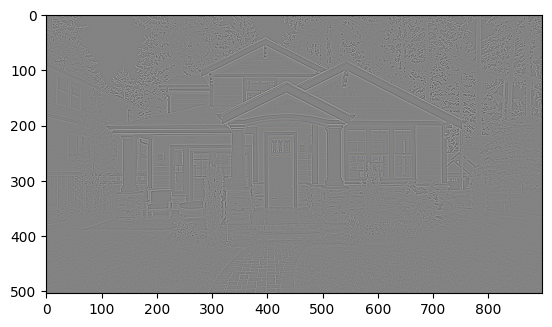

In [ ]:
plt.imshow(conv(imagen, filtro), cmap='gray')

In [ ]:
imagen = Image.open("casa.jpg").convert('L')
imagen = np.array(imagen)

In [ ]:
def maxpooling(image, kernel_size=(3, 3), stride=1):
    height, width = image.shape

    kernel_height, kernel_width = kernel_size

    output_height = (height - kernel_height) // stride + 1
    output_width = (width - kernel_width) // stride + 1

    output = np.zeros((output_height, output_width))

    for i in range(0, height - kernel_height + 1, stride):
        for j in range(0, width - kernel_width + 1, stride):
            region = image[i:i+kernel_height, j:j+kernel_width]
            output[i//stride, j//stride] = np.max(region)

    return output

In [ ]:
prueba = maxpooling(imagen)

(504, 898)

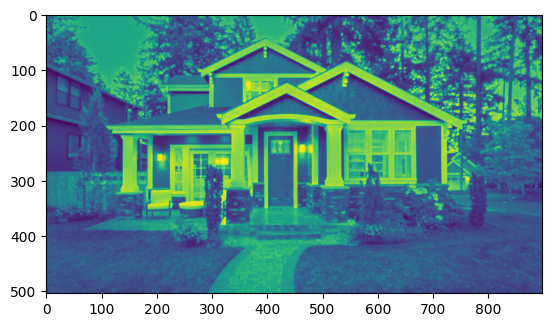

In [ ]:
plt.imshow(prueba)
prueba.shape